<a href="https://colab.research.google.com/github/seanmitchell1996/Data-Science-Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get data

In [1]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2024-08-07 05:18:29--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-08-07 05:18:29--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-08-07 05:18:30 (576 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



Import packages and view data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


Understand data

In [3]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


Dont want negative values with age. Cleaning data

In [6]:
cleaned_data = raw_data[raw_data['Age'] > 0]
df = cleaned_data

Checking for any null values

In [7]:
print(df.isnull().sum())

Age       0
Height    0
dtype: int64


Training model

In [8]:
X = df[['Age']]  # Independent variable
y = df['Height']  #dependent variable

Mean Squared Error: 4.704473632721191


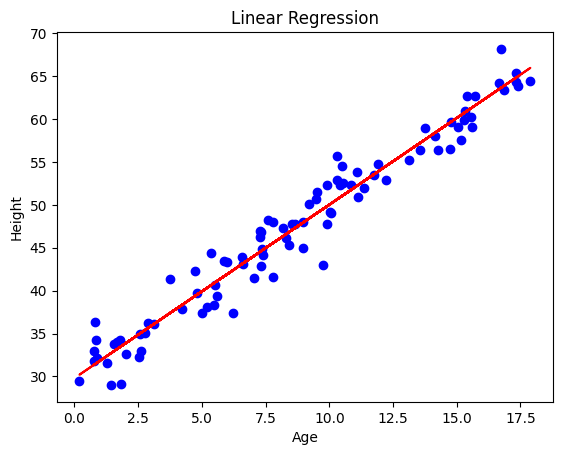

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize the Results
plt.scatter(X, y, color='blue')  # Plot data points
plt.plot(X, model.predict(X), color='red')  # Plot line of best fit
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Linear Regression')
plt.show()

Model seems to fit pretty well. Mean squared error is high though

In [16]:
!pip install statsmodels==0.13.5
import statsmodels.api as sm

X = cleaned_data['Age']
y = cleaned_data['Height']
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.4 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1929.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           4.68e-63
Time:                        05:30:35   Log-Likelihood:                -203.1

High R squared and low p values after test train split seem to indicate model is a good fit

Perfroming cross validation to gain further confidence in model

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
X = cleaned_data[['Age']]  # Features
y = cleaned_data['Height']  # Target variable
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.96249137 0.94587712 0.9438986  0.93715201 0.97269101]
Average cross-validation score: 0.9524220203009065


Below user can input age and model will predict height based on the dataset its been trained on

In [21]:
from sklearn.linear_model import LinearRegression

# Assuming 'cleaned_data' is available from your previous code
X = cleaned_data[['Age']]
y = cleaned_data['Height']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Prompt for user input
age_input = float(input("Enter age: "))

# Make prediction
predicted_height = model.predict([[age_input]])

print("Predicted height:", predicted_height[0])

Enter age: 10
Predicted height: 49.97602660372215


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
